In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
df = pd.read_csv('/Users/alexfriedman/Downloads/lrFinalProject/final_project/data/final_data.csv')


#cleaning some 
df['occupancy_non_residential'] = df['occupancy_non_residential'].fillna(0)
df['occupancy_residential'] = df['occupancy_residential'].fillna(0)
df[['station_count', 'avg_ride_duration_secs_start', 'n_rides_end',
       'avg_ride_duration_secs_end', 'n_rides_start']] = df[['station_count', 'avg_ride_duration_secs_start', 'n_rides_end',
       'avg_ride_duration_secs_end', 'n_rides_start']].fillna(0)
df['year_built_non_residential'] = df['year_built_non_residential'].fillna(df['year_built_non_residential'].mean())
df['year_built_residential'] = df['year_built_residential'].fillna(df['year_built_residential'].mean())
gramercy_median_home_val = 726595.0
df['MdVlE'] = df['MdVlE'].fillna(gramercy_median_home_val)
df.dropna(inplace=True)


In [143]:
df = df.drop(columns=['total_ghg_emissions_intensity'])

In [144]:
df = df[df['site_eui_kbtu_ft'] < df['site_eui_kbtu_ft'].quantile(0.99)]
df

,NTACode,n_rides_start,avg_ride_duration_secs_start,n_rides_end,avg_ride_duration_secs_end,primary_property_type,multifamily_housing_gross,site_eui_kbtu_ft,largest_property_use_type_residential,occupancy_residential,...,Pv125t149E,Pv150t174E,Pv175t184E,Pv185t199E,Pv200t299E,Pv300t399E,Pv400t499E,Pv500plE,Pop_1E,station_count
0,BK09,252137.0,2181.727413,252301.0,1800.981875,91,8641796.0,72.554945,1,98.525641,...,362,418,89,171,1452,1133,1583,14382,24140,81.0
1,BK17,0.0,0.000000,0.0,0.000000,91,8491196.0,85.092308,1,99.358974,...,3287,2949,774,1037,9755,8100,7387,18824,66293,0.0
2,BK19,0.0,0.000000,0.0,0.000000,93,7225352.0,76.434409,1,99.619565,...,2139,1588,559,708,4291,3002,2401,7733,34157,0.0
3,BK21,0.0,0.000000,0.0,0.000000,23,3043205.0,119.865217,1,98.529412,...,1886,1855,713,454,4289,2683,1552,3473,29677,0.0
4,BK23,0.0,0.000000,0.0,0.000000,12,7340578.0,75.583333,1,99.444444,...,364,844,104,313,2032,2127,1677,4687,15754,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,QN70,326262.0,1800.754455,318447.0,1950.728969,96,5494585.0,87.130208,1,98.620690,...,3733,3662,900,1711,12255,9720,8879,21183,77252,206.0
169,QN71,106531.0,1660.924561,111972.0,2333.360949,52,3202347.0,83.228846,1,98.900000,...,1599,1769,466,664,4575,2281,2365,6812,28110,74.0
170,QN72,153177.0,2446.146617,153880.0,2914.404306,44,2491035.0,87.661364,1,99.054054,...,1725,2438,728,1366,7558,6518,5503,15121,48179,132.0
171,QN76,0.0,0.000000,0.0,0.000000,5,230000.0,80.000000,0,100.000000,...,2207,2094,637,1295,6838,6510,5265,7220,39079,0.0


In [145]:
df.to_csv('final_data.csv')

In [141]:
# sns.histplot(df['site_eui_kbtu_ft'][df['site_eui_kbtu_ft'] < df['site_eui_kbtu_ft'].quantile(0.99)])

In [113]:
df['site_eui_kbtu_ft'][df['site_eui_kbtu_ft'] < df['site_eui_kbtu_ft'].quantile(0.99)]

0       72.554945
1       85.092308
2       76.434409
3      119.865217
4       75.583333
          ...    
168     87.130208
169     83.228846
170     87.661364
171     80.000000
172     53.660000
Name: site_eui_kbtu_ft, Length: 170, dtype: float64

In [114]:
df['total_ghg_emissions_intensity'] = df['total_ghg_emissions_intensity'] - df.total_ghg_emissions_intensity.mean()
sm.qqplot(df['total_ghg_emissions_intensity'])

KeyError: 'total_ghg_emissions_intensity'

In [122]:
import data_pull as dp
import geopandas as gpd

nta_geodf: gpd.GeoDataFrame = dp.get_nta_geog() # we have our geopandas multipolygon in the column called "geometry"

mg = nta_geodf.merge(df, on='NTACode')
# mg(column='largest_property_use_type_residential', legend=True, cmap='viridis')


In [123]:
columns_to_normalize = [
    'EA_LTHSGrE', 'EA_BchDHE', 'EA_HScGrdE', 'MgBSciArtE', 'SrvcE',
    'PvU50E', 'Pv50t74E', 'Pv75t99E', 'Pv100t124E', 'Pv125t149E', 'Pv150t174E',
    'Pv175t184E', 'Pv185t199E', 'Pv200t299E', 'Pv300t399E', 'Pv400t499E', 'Pv500plE'
]

mg[columns_to_normalize] = mg[columns_to_normalize].div(mg['Pop_1E'], axis=0)


Text(0.5, 1.0, 'Pct population making more than $27,000/yr')

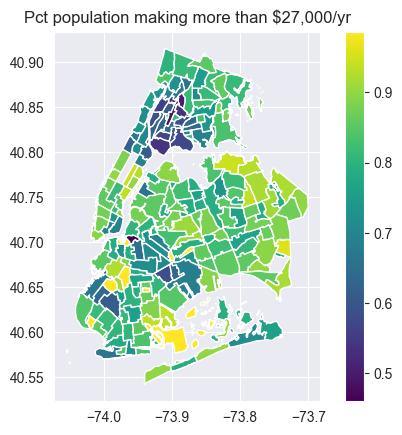

In [132]:

# mg['upov'] = mg['PvU50E'] + mg['Pv50t74E'] + mg['Pv75t99E']
mg['apov'] = mg[['Pv100t124E', 'Pv125t149E', 'Pv150t174E',
    'Pv175t184E', 'Pv185t199E', 'Pv200t299E', 'Pv300t399E', 'Pv400t499E', 'Pv500plE']].sum(axis=1)
mg.plot(column='apov', legend=True, cmap='viridis')
plt.title('Pct population making more than $27,000/yr')

In [130]:
mg[['Pv100t124E', 'Pv125t149E', 'Pv150t174E',
    'Pv175t184E', 'Pv185t199E', 'Pv200t299E', 'Pv300t399E', 'Pv400t499E', 'Pv500plE']].sum(axis=1)

0      0.895270
1      0.724300
2      0.855347
3      0.846866
4      0.615464
         ...   
167    0.686955
168    0.802319
169    0.694734
170    0.911216
171    0.986667
Length: 172, dtype: float64

([], [])

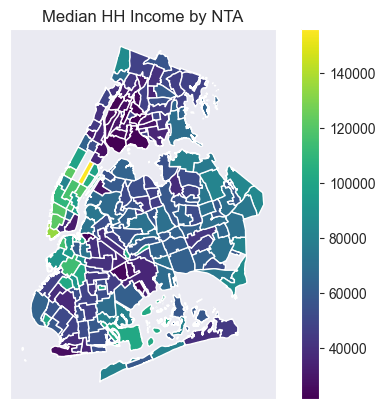

In [125]:
mg.plot(column='MdHHIncE', legend=True, cmap='viridis')
plt.title('Median HH Income by NTA')
plt.xticks([])
plt.yticks([])

<Axes: >

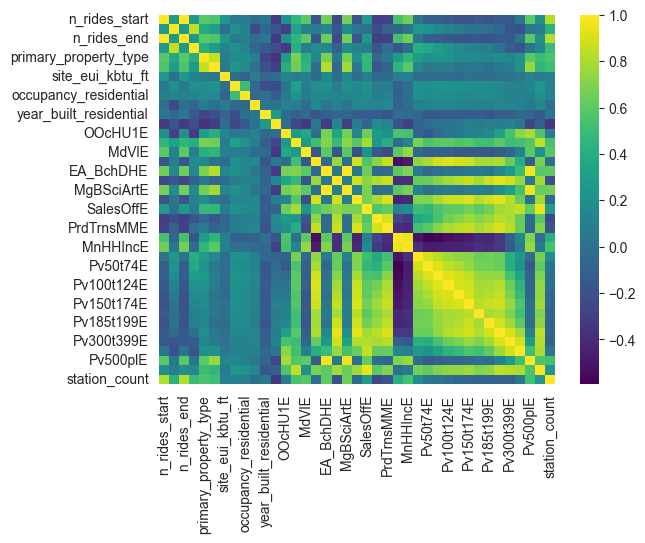

In [104]:
sns.heatmap(df.set_index('NTACode').corr(), cmap='viridis')

In [103]:
df

,NTACode,n_rides_start,avg_ride_duration_secs_start,n_rides_end,avg_ride_duration_secs_end,primary_property_type,multifamily_housing_gross,site_eui_kbtu_ft,largest_property_use_type_residential,occupancy_residential,...,Pv125t149E,Pv150t174E,Pv175t184E,Pv185t199E,Pv200t299E,Pv300t399E,Pv400t499E,Pv500plE,Pop_1E,station_count
0,BK09,252137.0,2181.727413,252301.0,1800.981875,91,8641796.0,72.554945,1,98.525641,...,362,418,89,171,1452,1133,1583,14382,24140,81.0
1,BK17,0.0,0.000000,0.0,0.000000,91,8491196.0,85.092308,1,99.358974,...,3287,2949,774,1037,9755,8100,7387,18824,66293,0.0
2,BK19,0.0,0.000000,0.0,0.000000,93,7225352.0,76.434409,1,99.619565,...,2139,1588,559,708,4291,3002,2401,7733,34157,0.0
3,BK21,0.0,0.000000,0.0,0.000000,23,3043205.0,119.865217,1,98.529412,...,1886,1855,713,454,4289,2683,1552,3473,29677,0.0
4,BK23,0.0,0.000000,0.0,0.000000,12,7340578.0,75.583333,1,99.444444,...,364,844,104,313,2032,2127,1677,4687,15754,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,QN70,326262.0,1800.754455,318447.0,1950.728969,96,5494585.0,87.130208,1,98.620690,...,3733,3662,900,1711,12255,9720,8879,21183,77252,206.0
169,QN71,106531.0,1660.924561,111972.0,2333.360949,52,3202347.0,83.228846,1,98.900000,...,1599,1769,466,664,4575,2281,2365,6812,28110,74.0
170,QN72,153177.0,2446.146617,153880.0,2914.404306,44,2491035.0,87.661364,1,99.054054,...,1725,2438,728,1366,7558,6518,5503,15121,48179,132.0
171,QN76,0.0,0.000000,0.0,0.000000,5,230000.0,80.000000,0,100.000000,...,2207,2094,637,1295,6838,6510,5265,7220,39079,0.0
